In [2]:
#Import necessary modules
import numpy as np
import pandas as pd
import operator
import os
from sklearn import model_selection
import re

In [3]:
# These are the stop words collected from the internet. These words wont be a part of our vocabulary.
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

In [4]:
X = []
Y = []
for category in os.listdir("./Datasets/"):
    for document in os.listdir("./Datasets/"+category+"/"):
        with open("./Datasets/"+category+"/"+document,"r",encoding="latin1") as f:
            X.append((document,f.read()))
            Y.append(category)
            

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [6]:
# Use a dictionary to store the frequency of each word.
dic = {}
for i in range(len(X_train)):
    word = X_train[i][1].lower()
    tokens = re.compile('\w+').findall(word)
    for s in tokens:
        # We will not include stop_words, alpha-numerics, punctuations or irrelevant word of length less than 2 in our dictionary
        if not(s.isalpha()) or s in stop_word or len(s) <=2:
            continue
        if s in dic:
            dic[s]+=1
        else:
            dic[s] = 1

In [7]:
# Sort the dictionary on basis of frequency of words in descending order.
sorted_dic = sorted(dic.items(),key=operator.itemgetter(1),reverse=True)

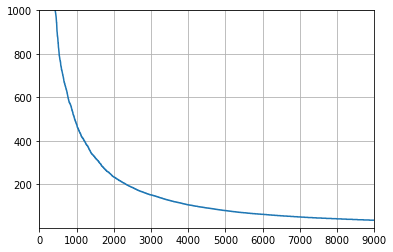

In [8]:
# Use matplotlib to plot a curve between number of words and their frequencies.
import matplotlib.pyplot as plt
r1 = []
r2 = []
for i in range(len(sorted_dic)):
    r1.append(i)
    r2.append(sorted_dic[i][1])
plt.plot(r1,r2)
plt.axis([0,9000,1,1000])
plt.grid()
plt.show()

In [9]:
# On basis of graph we decide to take first 2000 words.
final_words = [sorted_dic[i][0] for i in range(2000)]

In [10]:
# Making X_train_dataset.
# No of rows = no of rows in X_train and number of columns = number of final_words
X_train_dataset = np.zeros([len(X_train),len(final_words)],int)
for i in range(len(X_train)):
    word = X_train[i][1].lower()
    tokens = re.compile('\w+').findall(word)
    for s in tokens:
        if s in final_words:
            X_train_dataset[i][final_words.index(s)]+=1

In [11]:
# Making X_test_dataset
# No of rows = no of rows in X_test and number of columns = number of final_words
X_test_dataset = np.zeros([len(X_test),len(final_words)],int)
for i in range(len(X_test)):
    word = X_test[i][1].lower()
    tokens = re.compile('\w+').findall(word)
    for s in tokens:
        if s in final_words:
            X_test_dataset[i][final_words.index(s)]+=1

## 1. Using Sklearn's implementation of Naive Bayes 

In [12]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [13]:
# Demonstrating confusion-matrix and classification report
clf = MultinomialNB()
clf.fit(X_train_dataset,Y_train)
Y_pred = clf.predict(X_test_dataset)
print("Score on training data:",clf.score(X_train_dataset,Y_train))
print("Score on testing data:",clf.score(X_test_dataset,Y_test))
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

Score on training data: 0.893712075748483
Score on testing data: 0.8554
[[220   0   0   0   0   0   2   4   1   0   1   0   1   0   0   3   0   4
    0  32]
 [  0 198  13  14  10   7   8   4   0   0   0   0   7   1   1   0   0   0
    0   0]
 [  0   2 212  13   2  12   3   1   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   5   6 184  34   1   7   0   1   0   0   0   3   0   0   0   0   0
    0   0]
 [  0   3   2  18 207   0   5   0   0   0   0   0   4   0   1   0   0   0
    0   0]
 [  0  20  37   9   8 179   2   1   2   0   0   0   2   0   1   0   0   0
    0   0]
 [  0   0   1   3   1   1 237   5   0   0   0   0   1   0   2   0   0   0
    0   0]
 [  0   0   0   0   1   0   7 244   4   0   0   0   4   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   1   4   5 240   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   3   6 248  12   0   0   0   0   0   1   0
    0   0]
 [  0   0   0   0   0   0   2   1   4  12 220   0   0   0   1   0   0   0
    

## 2. By Implementing Naive Baye's From Scratch

In [14]:
# Making dictionary for implementing Naive Bayes
def fit(x_train_dataset,y_train):
    count = {}
    total_word = 0
    y_train = np.array(y_train)
    count["total_doc"] = len(y_train)
    classes = set(y_train)
    for i in classes:
        temp = 0
        #selecting x_train corresponding to class present in y_train
        x_train_with_i = x_train_dataset[y_train==i]
        #finding length of data with category corresponding to i 
        temp2 = x_train_with_i.shape[0]
        count[i] = {}
        #Iterating over final_words
        for feature in final_words:
            #Calculating total word in feature
            l = (x_train_with_i[:,final_words.index(feature)]).sum()
            count[i][feature] = l
            temp+=l
        #Total word in that class
        count[i]["word_in_class"]=temp
        #Length of data with y_train belonging to specific class
        count[i]["length"]=temp2
    return count

In [15]:
def probability(x_test,dic,classes):
    prob = np.log(dic[classes]["length"])-np.log(dic["total_doc"])
    feature = list(dic[classes].keys())
    #-2 is done becuase there will be "length" and "word in class" present in feature. 
    for j in range(len(feature)-2):
        xj = x_test[j]
        #If frequency is 0, we will not consider it
        if xj==0:
            current_prob=0
        else:
            #Extra addition part is Laplace correction
            num = dic[classes][feature[j]]+1
            den = dic[classes]["word_in_class"] + len(dic[classes].keys())-2
            current_prob = np.log(num)-np.log(den)
        prob+=current_prob
    return prob

In [32]:
#Best_class or probable answer will be returned from here
def predict_for_single(x_test,dic):
    first_run=True
    classes = dic.keys()
    for i in classes:
        if i == "total_doc":
            continue
        prob = probability(x_test,dic,i)
        if first_run or prob>best_prob:
            best_prob=prob
            first_run=False
            best_class=i
    return best_class
        

In [33]:
def predict_(x_test,dic):
    y_pred = []
    for x in x_test:
        y_pred.append(predict_for_single(x,dic))
    return y_pred

In [34]:
def score(y_test,y_pred):
    count=0
    for i in range(len(y_pred)):
        if y_pred[i] == y_test[i]:
            count+=1
    return count/len(y_pred)

In [35]:
dictionary=fit(X_train_dataset,Y_train)
y_pred=predict_(X_test_dataset,dictionary)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("Score on testing_data:",score(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

Score on testing_data: 0.8696
[[235   0   0   0   0   0   1   1   1   1   0   0   2   0   1   1   0   1
    0  24]
 [  0 216  14  12   4   6   3   1   0   0   0   0   3   4   0   0   0   0
    0   0]
 [  0  13 192  22   1  13   3   0   0   0   0   1   0   0   0   0   0   0
    0   0]
 [  0   6   2 198  26   0   4   0   0   0   0   0   5   0   0   0   0   0
    0   0]
 [  0   5   1  14 214   0   4   0   0   0   0   0   0   2   0   0   0   0
    0   0]
 [  0  26  30   5   7 189   2   0   0   0   0   0   2   0   0   0   0   0
    0   0]
 [  0   0   0   5   2   1 231   6   0   0   0   0   4   1   1   0   0   0
    0   0]
 [  0   0   0   0   1   0   7 246   2   0   0   0   4   0   0   0   0   0
    0   0]
 [  0   2   0   0   0   0   1   7 240   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   0   1 258  11   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   3   7 230   0   0   0   0   0   0   0
    0   0]
 [  0   3   0   0   1   0   0   1  